In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [2]:
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1,encoding="iso-8859-1")
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp


In [3]:
file = '../data/fluke_03-11-2021_07-11-2021_caja_abierta.csv'
fluke = importa_fluke(file)
fluke

,fluke
tiempo,
2021-11-03 13:36:25,410.0
2021-11-03 13:37:25,408.0
2021-11-03 13:38:25,441.0
2021-11-03 13:39:25,443.0
2021-11-03 13:40:25,427.0
...,...
2021-11-07 16:32:25,388.0
2021-11-07 16:33:25,389.0
2021-11-07 16:34:25,394.0


In [4]:
s8lp    = pd.read_csv('../data/S8LP.csv',index_col=0,parse_dates=True)
sen0220 = pd.read_csv('../data/SEN0220.csv',index_col=0,parse_dates=True)
scd30   = pd.read_csv('../data/SCD30.csv',index_col=0,parse_dates=True)
datos = pd.concat([s8lp,sen0220,scd30,fluke],axis=0)
sensores = datos.columns
datos.to_csv('../data/test.csv')

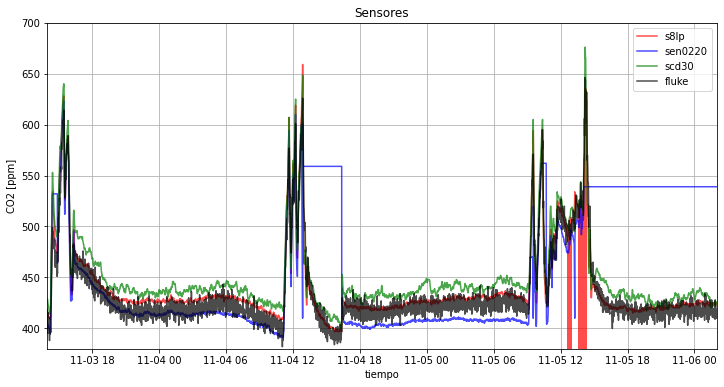

In [5]:
fig, ax = plt.subplots(figsize=(12,6))

fecha1 = parse("2021-11-03 14:00") 
fecha2 = fecha1 + pd.Timedelta("2.5D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(380,700)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

ax.plot(datos.s8lp,   'r-',label='s8lp',   alpha=0.7)
ax.plot(datos.sen0220,'b-',label='sen0220',alpha=0.7)
ax.plot(datos.scd30,  'g-',label='scd30',  alpha=0.7)
ax.plot(datos.fluke,  'k-',label='fluke',  alpha=0.7)

ax.legend()

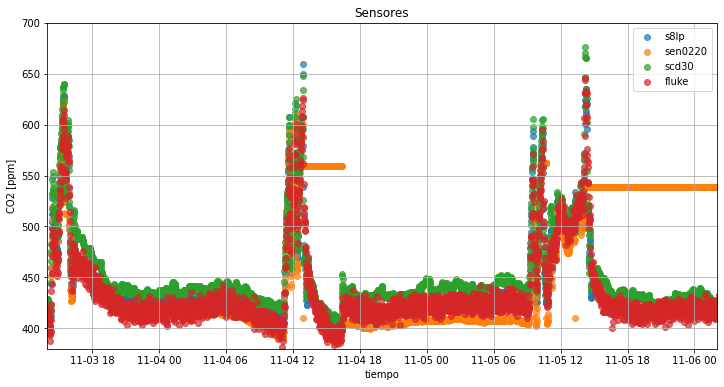

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

fecha1 = parse("2021-11-03 14:00") 
fecha2 = fecha1 + pd.Timedelta("2.5D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(380,700)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

ax.scatter(datos.index,datos.s8lp,   label='s8lp',   alpha=0.7)
ax.scatter(datos.index,datos.sen0220,label='sen0220',alpha=0.7)
ax.scatter(datos.index,datos.scd30,  label='scd30',  alpha=0.7)
ax.scatter(datos.index,datos.fluke,  label='fluke',  alpha=0.7)

ax.legend()